# 1) Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import numpy as np

In [51]:
dt=pd.read_csv("ToyotaCorolla - MLR.csv")
dt

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [52]:
dt.corr()

C:\Users\rajiv\AppData\Local\Temp\ipykernel_8756\1921767823.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dt.corr()


,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.033081,0.126389,0.185326,NaN,0.063104,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,0.031717,-0.098084,-0.148359,NaN,-0.005364,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,-0.081854,0.102683,-0.036197,NaN,0.015023,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.013144,0.035856,0.092424,NaN,0.209477,0.089614
Automatic,0.033081,0.031717,-0.081854,0.013144,1.000000,0.066740,-0.027654,NaN,-0.098555,0.057249
cc,0.126389,-0.098084,0.102683,0.035856,0.066740,1.000000,0.079903,NaN,0.014629,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,-0.027654,0.079903,1.000000,NaN,-0.160141,0.302618
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063104,-0.005364,0.015023,0.209477,-0.098555,0.014629,-0.160141,NaN,1.000000,0.020613
Weight,0.581198,-0.470253,-0.028598,0.089614,0.057249,0.335637,0.302618,NaN,0.020613,1.000000


# EDA

In [53]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


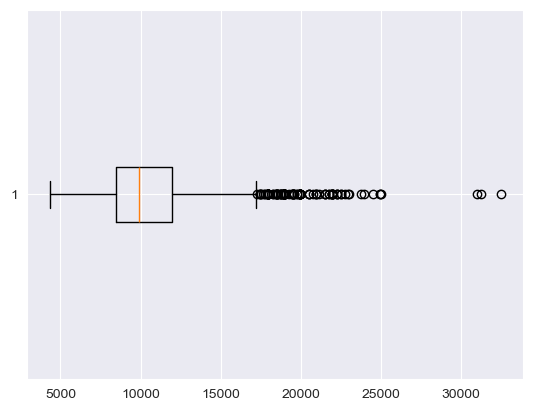

In [54]:
box1=plt.boxplot(dt['Price'],vert=False)

In [55]:
[item.get_xdata() for item in box1['fliers']]

[array([18600, 21500, 20950, 19950, 19600, 21500, 22500, 22000, 22750,
        17950, 17495, 17950, 19000, 17950, 17950, 21950, 17950, 20500,
        21950, 18950, 18750, 17950, 17950, 18950, 22250, 18950, 19950,
        18750, 18450, 18950, 17250, 17950, 17450, 17950, 21950, 22250,
        19950, 18900, 19950, 18750, 17450, 18990, 18500, 18500, 19450,
        18800, 17450, 17950, 32500, 31000, 31275, 24950, 24950, 22950,
        24990, 21950, 17900, 19250, 22250, 18950, 19950, 18950, 21750,
        17950, 18450, 23000, 19900, 23950, 19950, 18500, 18950, 20500,
        24500, 19450, 20950, 19950, 18450, 19500, 21750, 19500, 18900,
        19750, 19750, 18950, 20750, 19600, 19500, 17650, 19950, 19950,
        20950, 20500, 17795, 18245, 23750, 19500, 18950, 21950, 19950,
        18950, 19950, 21950, 22500, 18500, 18700, 21125, 21500, 17795,
        18245, 18950], dtype=int64)]

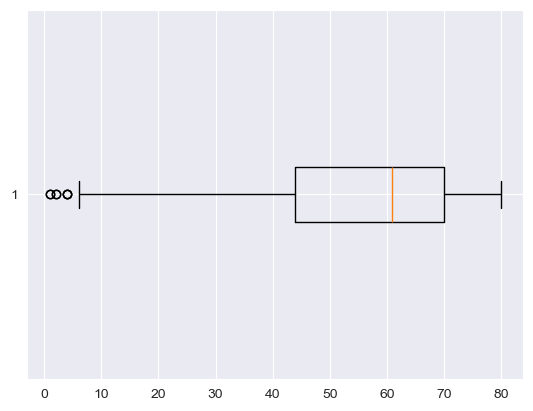

In [56]:
box2=plt.boxplot(dt['Age_08_04'],vert=False)

In [57]:
[item.get_xdata() for item in box2['fliers']]

[array([4, 4, 4, 2, 2, 1, 1], dtype=int64)]

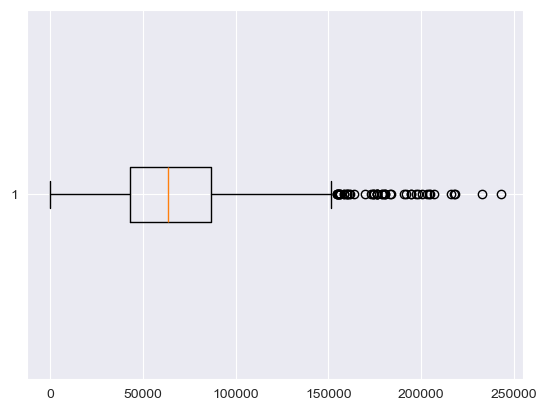

In [58]:
box3=plt.boxplot(dt['KM'],vert=False)

In [59]:
[item.get_xdata() for item in box3['fliers']]

[array([243000, 180638, 179860, 178858, 161000, 158320, 216000, 198167,
        176000, 174139, 174000, 205000, 204250, 194545, 190900, 183500,
        176184, 174833, 155720, 155500, 154783, 154462, 232940, 218118,
        217764, 207114, 203254, 200732, 197501, 194765, 191620, 183277,
        180378, 178800, 176177, 176000, 172980, 170000, 164000, 161775,
        160000, 159968, 159908, 158492, 156204, 156169, 155210, 155000,
        154900], dtype=int64)]

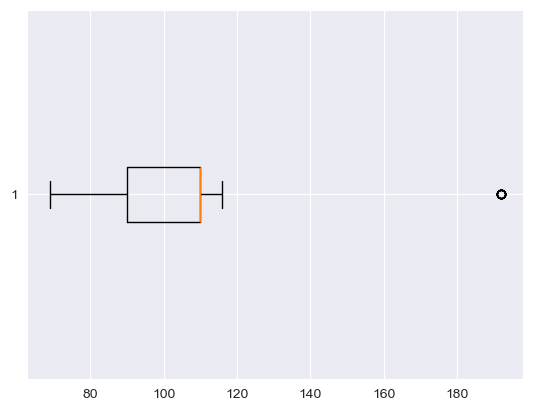

In [60]:
box4=plt.boxplot(dt['HP'],vert=False)

In [61]:
[item.get_xdata() for item in box4['fliers']]

[array([192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192], dtype=int64)]

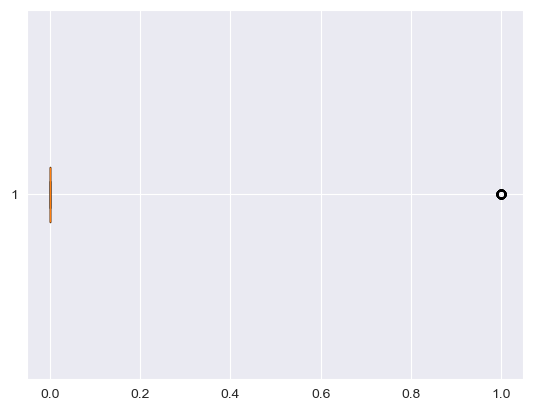

In [62]:
box5=plt.boxplot(dt['Automatic'],vert=False)

In [63]:
[item.get_xdata() for item in box5['fliers']]

[array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)]

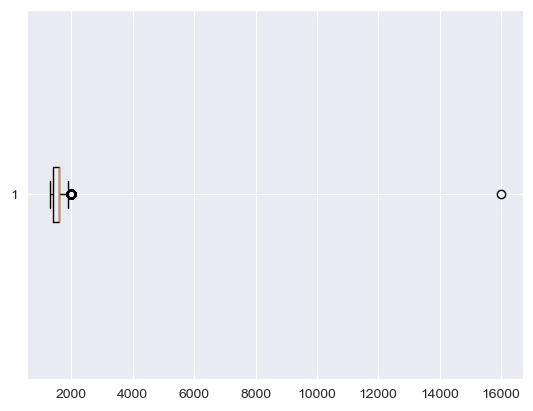

In [64]:
box6=plt.boxplot(dt['cc'],vert=False)

In [65]:
[item.get_xdata() for item in box6['fliers']]

[array([ 2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,
         2000,  2000,  2000,  2000,  2000,  2000, 16000,  2000,  2000,
         2000,  1995,  1995,  2000,  2000,  2000,  2000,  2000,  2000,
         2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,
         2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,
         2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,
         2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,
         2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,
         2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,
         2000,  2000,  1975,  2000,  2000,  2000,  2000,  2000,  2000,
         2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,
         2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,
         2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,
         2000,  2000,  2000,  2000,  2000,  2000], dtype=int64)]

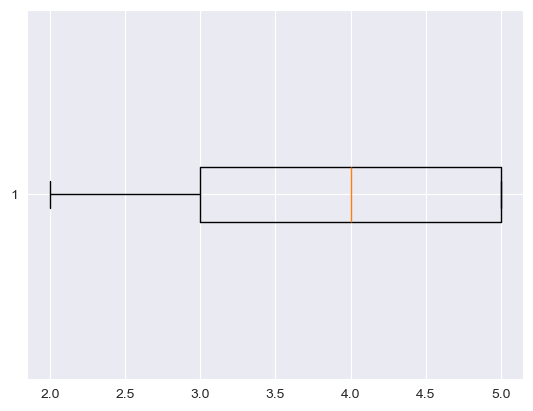

In [66]:
box7=plt.boxplot(dt['Doors'],vert=False)

In [67]:
[item.get_xdata() for item in box7['fliers']]

[array([], dtype=int64)]

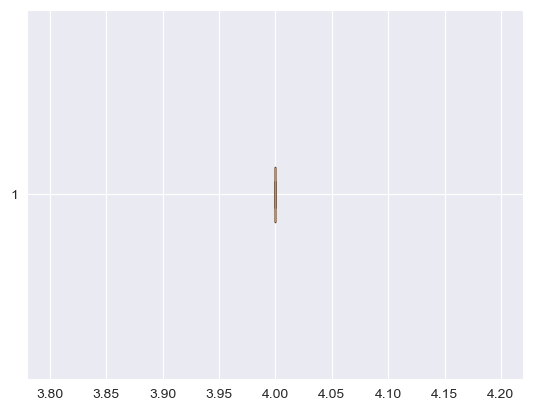

In [68]:
box8=plt.boxplot(dt['Cylinders'],vert=False)

In [69]:
[item.get_xdata() for item in box8['fliers']]

[array([], dtype=int64)]

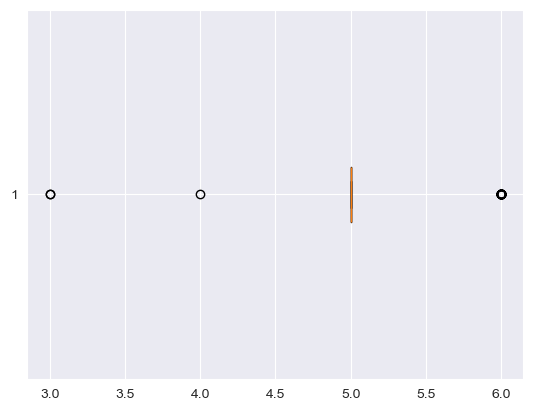

In [70]:
box9=plt.boxplot(dt['Gears'],vert=False)

In [71]:
[item.get_xdata() for item in box9['fliers']]

[array([3, 3, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 6], dtype=int64)]

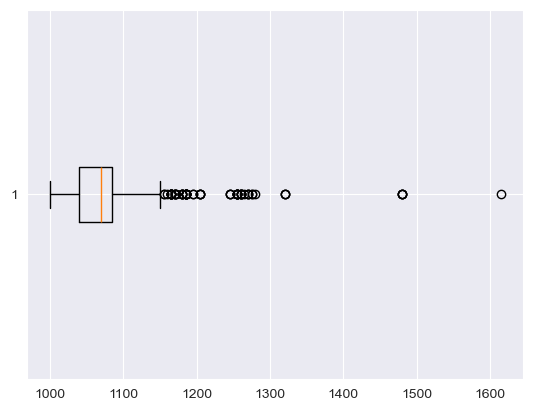

In [72]:
box10=plt.boxplot(dt['Weight'],vert=False)

In [73]:
[item.get_xdata() for item in box10['fliers']]

[array([1165, 1165, 1165, 1165, 1170, 1170, 1245, 1245, 1185, 1185, 1185,
        1185, 1185, 1185, 1185, 1185, 1170, 1255, 1255, 1270, 1255, 1255,
        1195, 1255, 1180, 1195, 1165, 1180, 1275, 1180, 1180, 1245, 1265,
        1260, 1260, 1260, 1155, 1480, 1480, 1480, 1320, 1320, 1270, 1280,
        1270, 1255, 1275, 1255, 1320, 1185, 1165, 1180, 1160, 1205, 1205,
        1205, 1170, 1615, 1165, 1205, 1165, 1260, 1260, 1155, 1480, 1172],
       dtype=int64)]

<Axes: xlabel='Price', ylabel='Count'>

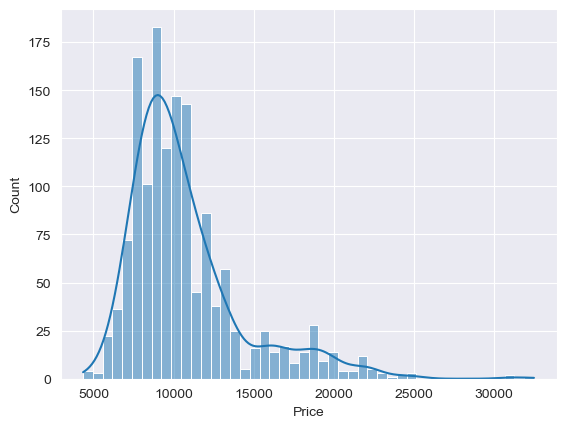

In [74]:
sns.histplot(dt["Price"],kde=True)

<Axes: xlabel='Age_08_04', ylabel='Count'>

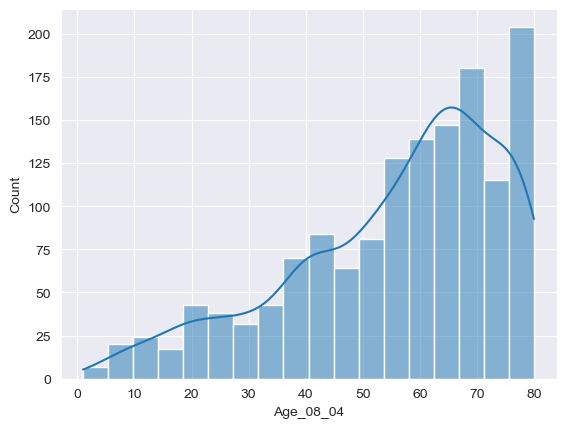

In [75]:
sns.histplot(dt["Age_08_04"],kde=True)

<Axes: xlabel='KM', ylabel='Count'>

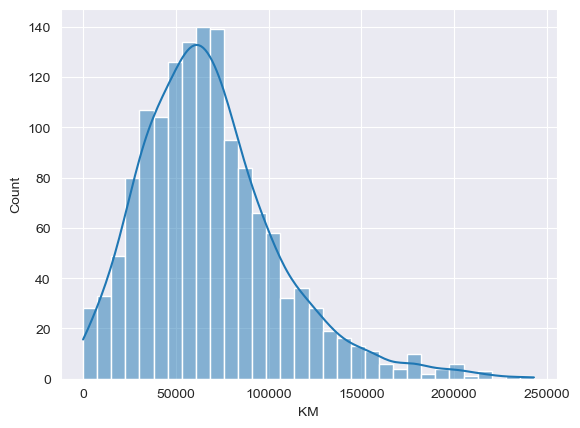

In [76]:
sns.histplot(dt["KM"],kde=True)

<Axes: xlabel='HP', ylabel='Count'>

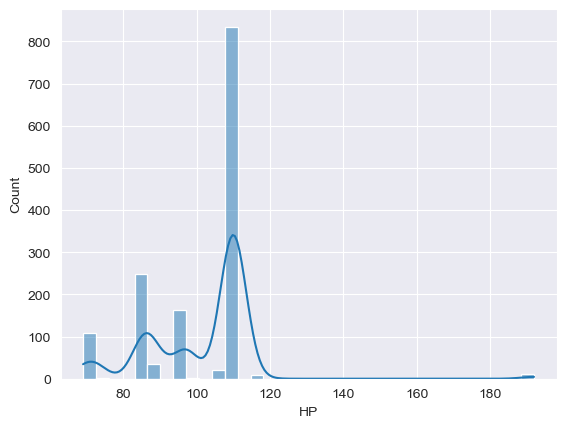

In [77]:
sns.histplot(dt["HP"],kde=True)

<Axes: xlabel='Automatic', ylabel='Count'>

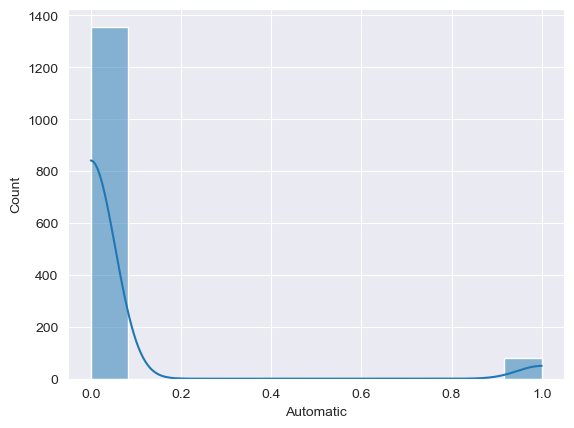

In [78]:
sns.histplot(dt["Automatic"],kde=True)

<Axes: xlabel='cc', ylabel='Count'>

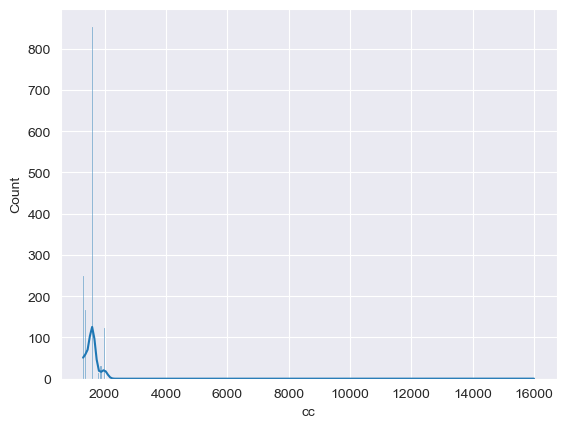

In [79]:
sns.histplot(dt["cc"],kde=True)

<Axes: xlabel='Doors', ylabel='Count'>

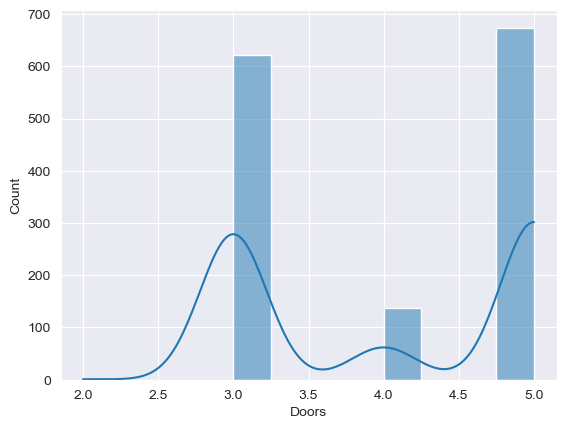

In [80]:
sns.histplot(dt["Doors"],kde=True)

<Axes: xlabel='Cylinders', ylabel='Count'>

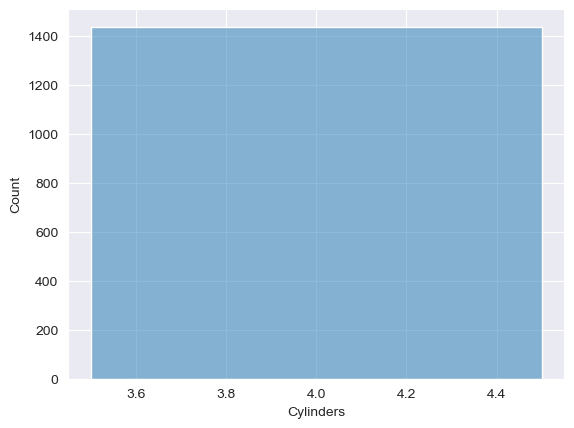

In [81]:
sns.histplot(dt["Cylinders"],kde=True)

<Axes: xlabel='Gears', ylabel='Count'>

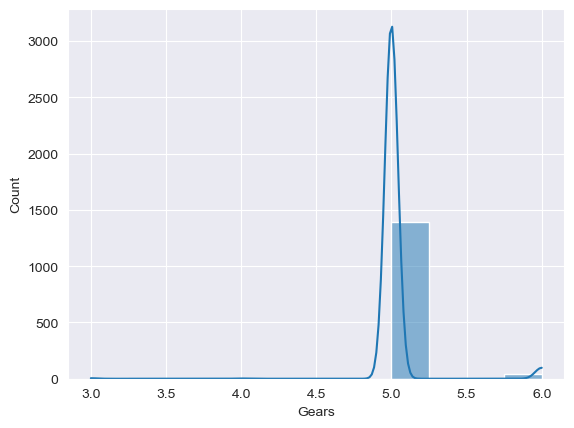

In [82]:
sns.histplot(dt["Gears"],kde=True)

<Axes: xlabel='Weight', ylabel='Count'>

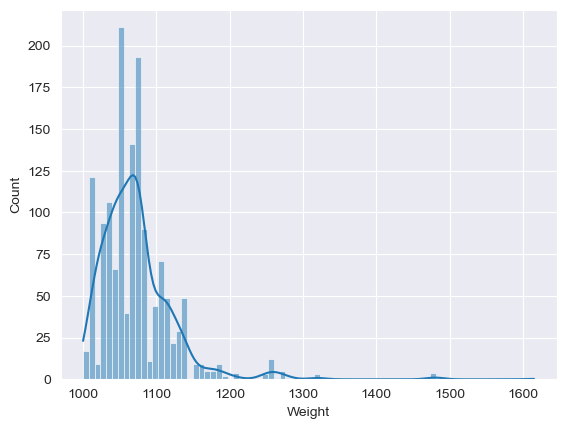

In [83]:
sns.histplot(dt["Weight"],kde=True)

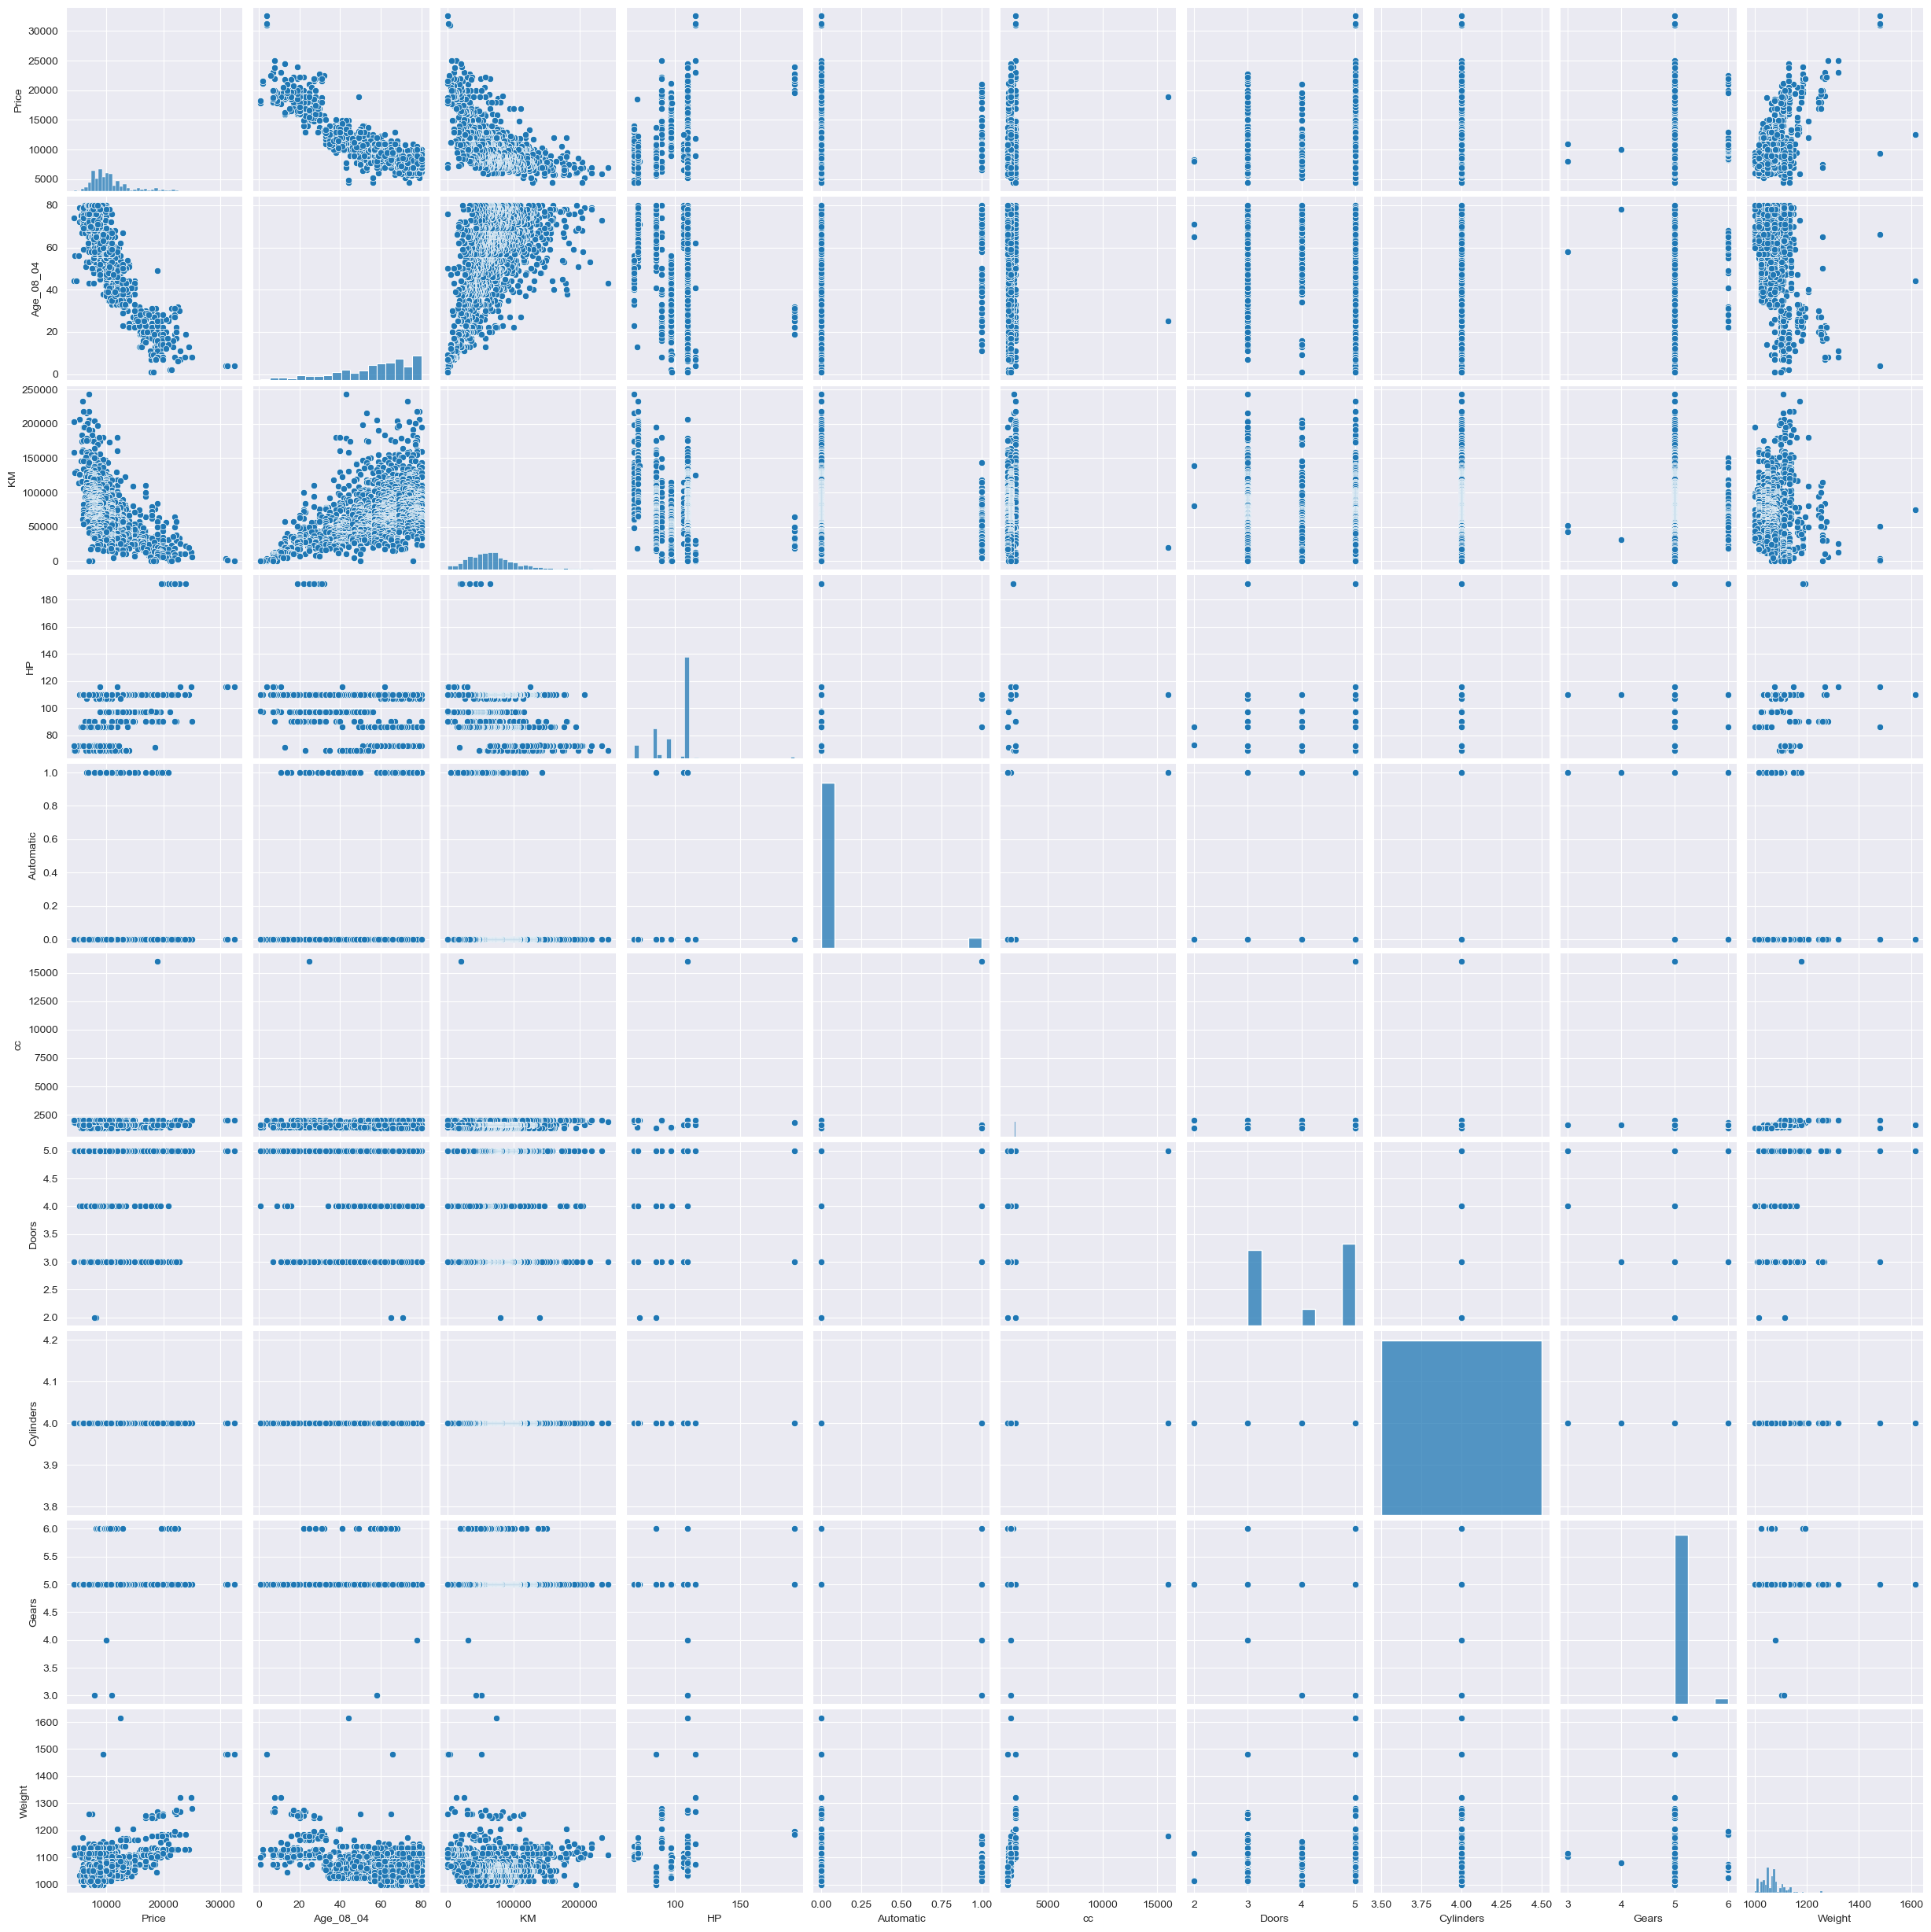

In [84]:
sns.set_style(style='darkgrid')
sns.pairplot(dt)

In [85]:
dt.isna().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [86]:
dt.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [87]:
dt_with_dummies=pd.get_dummies(dt, columns=['Fuel_Type'])
dt_with_dummies

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,0,1,0
1,13750,23,72937,90,0,2000,3,4,5,1165,0,1,0
2,13950,24,41711,90,0,2000,3,4,5,1165,0,1,0
3,14950,26,48000,90,0,2000,3,4,5,1165,0,1,0
4,13750,30,38500,90,0,2000,3,4,5,1170,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,4,5,1025,0,0,1
1432,10845,72,19000,86,0,1300,3,4,5,1015,0,0,1
1433,8500,71,17016,86,0,1300,3,4,5,1015,0,0,1
1434,7250,70,16916,86,0,1300,3,4,5,1015,0,0,1


# 2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [88]:
dt_with_dummies.corr()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
Price,1.000000,-0.876590,-0.569960,0.314990,0.033081,0.126389,0.185326,NaN,0.063104,0.581198,-0.039536,0.054084,-0.038516
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,0.031717,-0.098084,-0.148359,NaN,-0.005364,-0.470253,0.002389,-0.097740,0.092611
KM,-0.569960,0.505672,1.000000,-0.333538,-0.081854,0.102683,-0.036197,NaN,0.015023,-0.028598,0.144016,0.403060,-0.433160
HP,0.314990,-0.156622,-0.333538,1.000000,0.013144,0.035856,0.092424,NaN,0.209477,0.089614,0.062109,-0.533453,0.489110
Automatic,0.033081,0.031717,-0.081854,0.013144,1.000000,0.066740,-0.027654,NaN,-0.098555,0.057249,0.001486,-0.084490,0.080249
cc,0.126389,-0.098084,0.102683,0.035856,0.066740,1.000000,0.079903,NaN,0.014629,0.335637,0.005941,0.327723,-0.315170
Doors,0.185326,-0.148359,-0.036197,0.092424,-0.027654,0.079903,1.000000,NaN,-0.160141,0.302618,0.009680,0.025495,-0.027589
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063104,-0.005364,0.015023,0.209477,-0.098555,0.014629,-0.160141,NaN,1.000000,0.020613,-0.049537,-0.048847,0.063182
Weight,0.581198,-0.470253,-0.028598,0.089614,0.057249,0.335637,0.302618,NaN,0.020613,1.000000,0.052756,0.568087,-0.560470


In [89]:
X=dt_with_dummies.iloc[:,1:]
y=dt_with_dummies.iloc[:,0]
X



,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,23,46986,90,0,2000,3,4,5,1165,0,1,0
1,23,72937,90,0,2000,3,4,5,1165,0,1,0
2,24,41711,90,0,2000,3,4,5,1165,0,1,0
3,26,48000,90,0,2000,3,4,5,1165,0,1,0
4,30,38500,90,0,2000,3,4,5,1170,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,69,20544,86,0,1300,3,4,5,1025,0,0,1
1432,72,19000,86,0,1300,3,4,5,1015,0,0,1
1433,71,17016,86,0,1300,3,4,5,1015,0,0,1
1434,70,16916,86,0,1300,3,4,5,1015,0,0,1


In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
#from sklearn.preprocessing import StandardScaler 
#scaler=StandardScaler()
#X_train=scaler.fit_transform(X_train)
#X_test=scaler.fit_transform(X_test)

In [92]:
X_train

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
899,62,59295,86,0,1300,5,4,5,1035,0,0,1
881,68,61568,110,0,1600,4,4,5,1035,0,0,1
310,40,38653,110,0,1600,5,4,5,1080,0,0,1
1145,75,101855,110,0,1600,5,4,5,1070,0,0,1
31,22,35199,97,0,1400,3,4,5,1100,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1095,76,125778,110,0,1600,3,4,5,1050,0,0,1
1130,73,107108,110,0,1600,3,4,5,1050,0,0,1
1294,80,71740,110,0,1600,5,4,5,1070,0,0,1
860,63,64690,86,0,1300,3,4,5,1020,0,0,1


# 3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.

# Models

In [93]:

model1=smf.ols('Price~Age_08_04+KM+HP+Automatic+cc+Doors+Cylinders+Gears+Fuel_Type_CNG+Fuel_Type_Diesel+Fuel_Type_Petrol+Weight',data=dt_with_dummies).fit()

In [94]:
import pandas as pd
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif
import matplotlib.pyplot as plt

In [95]:
array=dt_with_dummies.values
X = array[:,0:10]
Y = array[:,0]
test = SelectKBest(score_func = f_classif,  k=5)
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=2)
print(fit.scores_)
features = fit.transform(X)
print(features)


[  inf 30.65  4.64  2.57  1.08  0.68  1.24   nan  0.69  7.33]
[[13500    23 46986    90  1165]
 [13750    23 72937    90  1165]
 [13950    24 41711    90  1165]
 ...
 [ 8500    71 17016    86  1015]
 [ 7250    70 16916    86  1015]
 [ 6950    76     1   110  1114]]


C:\Users\rajiv\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [0 7] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\rajiv\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
C:\Users\rajiv\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [96]:
model2=smf.ols('Price~Age_08_04+KM+HP+Automatic+cc+Fuel_Type_CNG+Fuel_Type_Diesel+Fuel_Type_Petrol+Weight',data=dt_with_dummies).fit()

In [97]:
model3=smf.ols('Price~Age_08_04+KM+HP+Automatic+cc+Fuel_Type_CNG+Fuel_Type_Diesel+Fuel_Type_Petrol',data=dt_with_dummies).fit()

# coefficients are listed in the summary

In [98]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     912.3
Date:                Wed, 29 May 2024   Prob (F-statistic):               0.00
Time:                        22:51:15   Log-Likelihood:                -12369.
No. Observations:                1436   AIC:                         2.476e+04
Df Residuals:                    1425   BIC:                         2.482e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -536.2488     87.966     -6.096      0.000    -708.806    -363.691
Age_08_04         -123.7771      2.631    -47.043      0.000    -128.938    -118.616
KM                  -0.0175      0.001    -13.154      0.000      -0.020      -0.015
HP                  23.5270      3.575      6.581      0.000      16.515      30.539
Automatic          300.2592    161.026      1.865      0.062     -15.614     616.133
cc                  -0.0556      0.092     -0.604      0.546      -0.236       0.125
Doors              -30.3567     40.908     -0.742      0.458    -110.603      49.890
Cylinders        -2144.9951    351.866     -6.096      0.000   -2835.225   -1454.765
Gears              622.7990    198.026      3.145      0.002     234.346    1011.252
Fuel_Type_CNG     -744.7999    228.075     -3.266      0.001   -1192.198    -297.401
Fuel_Type_Diesel  -190.7456    191.966     -0.994      0.321    -567.311     185.820
Fuel_Type_Petrol   399.2967    138.672      2.879      0.004     127.274     671.320
Weight              20.8174      1.218     17.090      0.000      18.428      23.207
==============================================================================
Omnibus:                      265.277   Durbin-Watson:                   1.605
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2773.279
Skew:                          -0.532   Prob(JB):                         0.00
Kurtosis:                       9.724   Cond. No.                     1.63e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.32e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [99]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Wed, 29 May 2024   Prob (F-statistic):               0.00
Time:                        22:51:16   Log-Likelihood:                -12375.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -4562.4961    902.170     -5.057      0.000   -6332.218   -2792.774
Age_08_04         -123.9040      2.640    -46.935      0.000    -129.082    -118.725
KM                  -0.0173      0.001    -13.036      0.000      -0.020      -0.015
HP                  26.2029      3.499      7.488      0.000      19.338      33.067
Automatic          269.8803    160.038      1.686      0.092     -44.054     583.815
cc                  -0.0625      0.092     -0.677      0.499      -0.244       0.119
Fuel_Type_CNG    -2159.5829    377.814     -5.716      0.000   -2900.714   -1418.452
Fuel_Type_Diesel -1456.2839    404.082     -3.604      0.000   -2248.943    -663.625
Fuel_Type_Petrol  -946.6294    263.357     -3.594      0.000   -1463.238    -430.020
Weight              20.3761      1.149     17.738      0.000      18.123      22.629
==============================================================================
Omnibus:                      248.544   Durbin-Watson:                   1.604
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2401.782
Skew:                          -0.498   Prob(JB):                         0.00
Kurtosis:                       9.257   Cond. No.                     4.52e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.29e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [100]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     1023.
Date:                Wed, 29 May 2024   Prob (F-statistic):               0.00
Time:                        22:51:16   Log-Likelihood:                -12518.
No. Observations:                1436   AIC:                         2.505e+04
Df Residuals:                    1428   BIC:                         2.510e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.071e+04    297.711     35.970      0.000    1.01e+04    1.13e+04
Age_08_04         -140.8595      2.718    -51.833      0.000    -146.190    -135.529
KM                  -0.0190      0.001    -12.948      0.000      -0.022      -0.016
HP                  58.3017      3.308     17.626      0.000      51.813      64.790
Automatic          842.4305    173.108      4.867      0.000     502.858    1182.003
cc                  -0.0025      0.102     -0.025      0.980      -0.202       0.197
Fuel_Type_CNG     2426.2799    304.253      7.975      0.000    1829.449    3023.111
Fuel_Type_Diesel  5279.8857    152.456     34.632      0.000    4980.824    5578.948
Fuel_Type_Petrol  3002.4856    155.349     19.327      0.000    2697.749    3307.222
==============================================================================
Omnibus:                      217.185   Durbin-Watson:                   1.387
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1285.585
Skew:                           0.554   Prob(JB):                    6.90e-280
Kurtosis:                       7.501   Cond. No.                     4.79e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.82e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# 4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.

In [101]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [102]:
(model1.rsquared,model1.rsquared_adj)

(0.8649083778053924, 0.8639603664215706)

In [103]:
(model2.rsquared,model2.rsquared_adj)

(0.8637902597636861, 0.8630266452423893)

In [104]:
#New data for prediction
new_data=pd.DataFrame({'Age_08_04':46,	'KM':153,'HP':85,'Automatic':0,'cc':2000,'Doors':4,'Cylinders':4,'Gears':5	,'Weight':1156,'Fuel_Type_CNG':1,'Fuel_Type_Diesel':0,'Fuel_Type_Petrol':0},index=[1])
new_data

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
1,46,153,85,0,2000,4,4,5,1156,1,0,0


In [105]:
model1.predict(new_data)

1    13388.549816
dtype: float64

In [106]:
model2.predict(new_data)

1    13232.746763
dtype: float64

In [107]:
model3.predict(new_data)

1    11603.060729
dtype: float64

In [108]:
pred_y = model1.predict(dt_with_dummies)
pred_y

0       16304.152422
1       15849.403232
2       16272.811172
3       15915.052508
4       15690.503276
            ...     
1431     8694.200430
1432     8141.751414
1433     8300.294866
1434     8425.824273
1435    10527.736468
Length: 1436, dtype: float64

In [109]:
pred_y = model2.predict(dt_with_dummies)
pred_y

0       16288.870881
1       15839.278668
2       16256.354465
3       15899.591709
4       15670.440332
            ...     
1431     8643.300721
1432     8094.577377
1433     8252.853489
1434     8378.489944
1435    10555.474926
Length: 1436, dtype: float64

In [110]:
pred_y = model3.predict(dt_with_dummies)
pred_y

0       17100.047038
1       16608.047567
2       17059.195125
3       16658.244291
4       16274.914713
            ...     
1431     8612.988198
1432     8219.682026
1433     8398.155772
1434     8540.911163
1435     9414.921528
Length: 1436, dtype: float64

In [111]:
df= pd.DataFrame()
df["Predicted_y"]= pd.DataFrame(pred_y)
df["actual_y"] =dt_with_dummies["Price"]
df

,Predicted_y,actual_y
0,17100.047038,13500
1,16608.047567,13750
2,17059.195125,13950
3,16658.244291,14950
4,16274.914713,13750
...,...,...
1431,8612.988198,7500
1432,8219.682026,10845
1433,8398.155772,8500
1434,8540.911163,7250


In [112]:
mse= mean_squared_error(df['actual_y'],df['Predicted_y'])
mse

2185352.3155226572

In [113]:
mae = mean_absolute_error(df["actual_y"], df["Predicted_y"])
mae

1102.4086892126084

In [114]:
rmse = np.sqrt(mse)
rmse

1478.2937176091418

# 5.Apply Lasso and Ridge methods on the model.

In [122]:
import matplotlib.pyplot as plt 
from sklearn import datasets 


In [123]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

In [124]:
from sklearn.linear_model import Ridge 
ridgeR = Ridge(alpha = 5) 
ridgeR.fit(X_train, y_train) 
y_pred = ridgeR.predict(X_test)
mean_squared_error_ridge = np.mean((y_pred - y_test)**2) 
print('MSE:',mean_squared_error_ridge) 
reg_coefficient['Ridge_Reg_Coeff'] = pd.Series(ridgeR.coef_) 
reg_coefficient

MSE: 2180869.9858112987


,Columns,Normal_Reg_Coeff,Ridge_Reg_Coeff
0,Age_08_04,-1.208305e+02,-120.766336
1,KM,-1.623141e-02,-0.016546
2,HP,1.403948e+01,15.248748
3,Automatic,1.488309e+02,147.461946
4,cc,-3.037219e-02,-0.036125
5,Doors,-6.031097e+01,-57.336963
6,Cylinders,-8.526513e-14,0.000000
7,Gears,5.516007e+02,496.736659
8,Weight,2.588496e+01,25.428077
9,Fuel_Type_CNG,-4.340867e+02,-380.049033


In [128]:
from sklearn.linear_model import Lasso 

lasso = Lasso(alpha = 1)
lasso.fit(X_train, y_train) 
y_pred1 = lasso.predict(X_test) 

mean_squared_error = np.mean((y_pred1 - y_test)**2)
print("Mean squared error on test set", mean_squared_error) 

reg_coefficient['Lasso_reg_Coeff'] = pd.Series(lasso.coef_) 
reg_coefficient

Mean squared error on test set 2195387.249832786


,Columns,Normal_Reg_Coeff,Ridge_Reg_Coeff,Lasso_reg_Coeff
0,Age_08_04,-1.208305e+02,-120.766336,-120.798032
1,KM,-1.623141e-02,-0.016546,-0.016326
2,HP,1.403948e+01,15.248748,14.559220
3,Automatic,1.488309e+02,147.461946,133.401451
4,cc,-3.037219e-02,-0.036125,-0.032399
5,Doors,-6.031097e+01,-57.336963,-58.673162
6,Cylinders,-8.526513e-14,0.000000,0.000000
7,Gears,5.516007e+02,496.736659,522.177478
8,Weight,2.588496e+01,25.428077,25.721963
9,Fuel_Type_CNG,-4.340867e+02,-380.049033,0.000000


# Interview questions